## RCM of ccRCC vs PanCan

Basically have a look at what genes are shared and different between ccRCC and PanCan for each cluster.

In [16]:
# Imports
import pandas as pd
import os
import matplotlib.pyplot as plt

cancer = 'ClearCellRenalCellCarcinoma'
input_dir = 'Input_Data'
output_dir = 'Output_Data'
supp_dir = 'Required_Refs'
fig_dir = 'Output_Figures'
reg_label = 'RG2_Changes_filtered'

ccrcc = pd.read_csv(os.path.join(input_dir, 'sircle_PorMandR_ClearCellRenalCellCarcinoma.csv'))
pancan = pd.read_csv(os.path.join(input_dir, 'sircle_PorMandR_PanCan.csv'))

rcm_labels = ["TMDE", "TMDS", "TPDE_TMDS", "TPDE", "TPDS_TMDE", "TPDS", "MDS_TMDE", "MDE",  "MDE_TMDS", "MDS"]

values = []
cluster = []
lbls = []
genes = []


    
for r in rcm_labels:
    ccrcc_r = ccrcc[ccrcc[reg_label].values == r]
    pancan_r = pancan[pancan[reg_label].values == r]
    shared_genes = list(set(ccrcc_r['gene_name'].values) & set(pancan_r['gene_name'].values))
    ccrcc_genes = [c for c in ccrcc_r['gene_name'].values if c not in pancan_r['gene_name'].values]
    pancan_genes = [c for c in pancan_r['gene_name'].values if c not in ccrcc_r['gene_name'].values]
    print(r, len(shared_genes), len(ccrcc_genes), len(pancan_genes))

    # Add values for the stacked bar chart
    values.append(len(ccrcc_genes))
    values.append(len(pancan_genes))
    values.append(len(shared_genes))

    genes.append(' '.join(ccrcc_genes))
    genes.append(' '.join(pancan_genes))
    genes.append(' '.join(shared_genes))

    # Add in the labels
    lbls.append('ccRCC unique')
    lbls.append('PanCan unique')
    lbls.append('Shared')
    
    # Add in the cluster
    cluster.append(r)
    cluster.append(r)
    cluster.append(r)
    
    

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_8104/2636475310.py:13: DtypeWarning: Columns (1,2,353,381,383,384,388,389,583,584,585) have mixed types. Specify dtype option on import or set low_memory=False.
  ccrcc = pd.read_csv(os.path.join(input_dir, 'sircle_PorMandR_ClearCellRenalCellCarcinoma.csv'))
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_8104/2636475310.py:14: DtypeWarning: Columns (1,2,1161,1163,1164,1167,1176,1177,1178,1179,1180,1181,1182,1195,1197,1198,1202,1203,1208,1974,1975,1976) have mixed types. Specify dtype option on import or set low_memory=False.
  pancan = pd.read_csv(os.path.join(input_dir, 'sircle_PorMandR_PanCan.csv'))


TMDE 26 392 150
TMDS 68 984 328
TPDE_TMDS 53 561 251
TPDE 8 196 29
TPDS_TMDE 96 781 648
TPDS 30 424 166
MDS_TMDE 23 337 88
MDE 17 412 80
MDE_TMDS 139 977 563
MDS 8 155 20


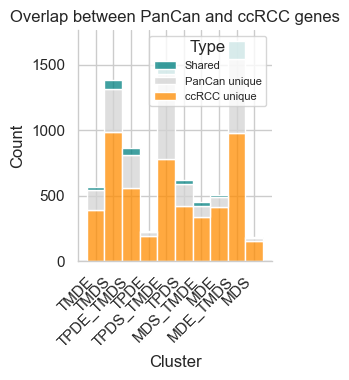

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'Cluster': cluster,
    'Type': lbls,
    'Value': values, 
    'Genes': genes})
plt.rcParams["figure.figsize"] = (2.5,3)
plt.rcParams['svg.fonttype'] = 'none'

ax = sns.histplot(df, x='Cluster', hue='Type', hue_order=['Shared', 'PanCan unique', 'ccRCC unique'], 
                  weights='Value', multiple='stack', palette=['teal', 'lightgrey', 'darkorange'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, horizontalalignment='right')
plt.title('Overlap between PanCan and ccRCC genes')
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(0)
ax.spines['left'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(0)
plt.savefig(os.path.join(fig_dir, f'StackedBar_overlap.svg'))
plt.show()

In [18]:
df.to_csv('PanCan_CCRCC_SiRCLe.csv')

## Plot ORA to show that this is also different

Clearly will be given they get different genes.

Here we plot as an overlapping dot plot the different ORA terms that pop up.

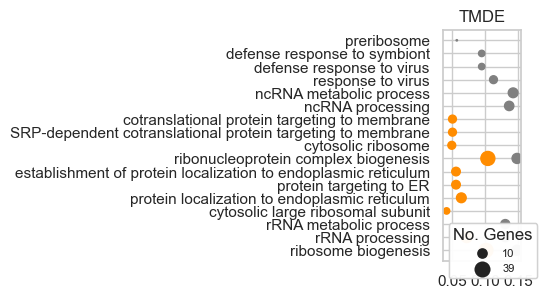

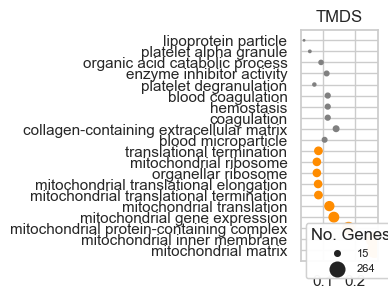

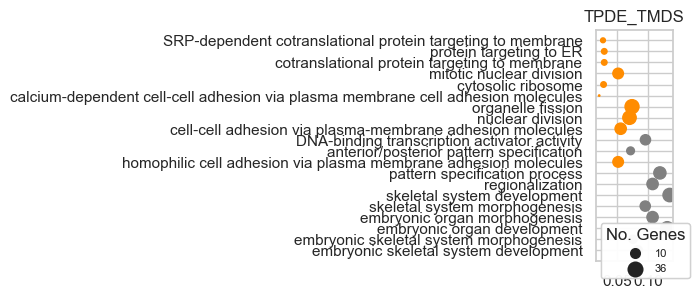

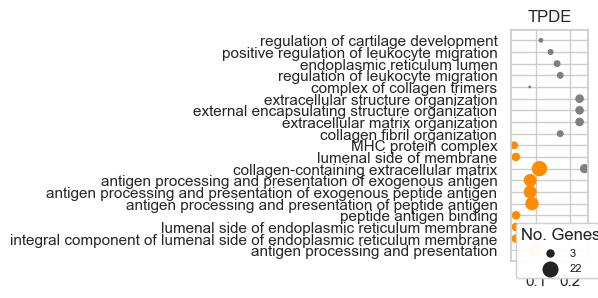

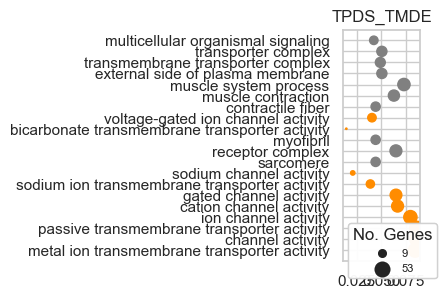

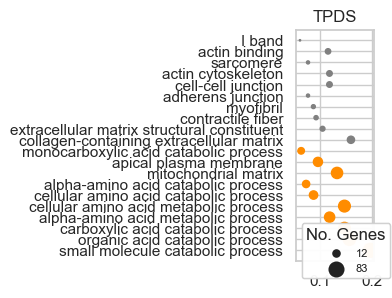

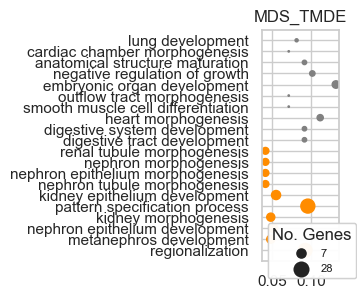

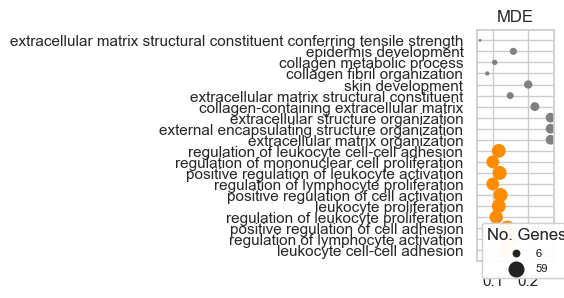

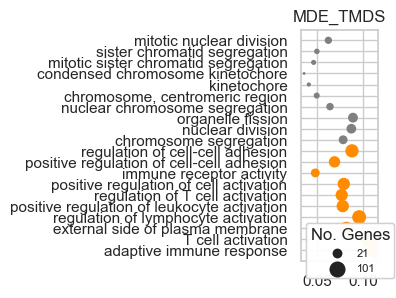

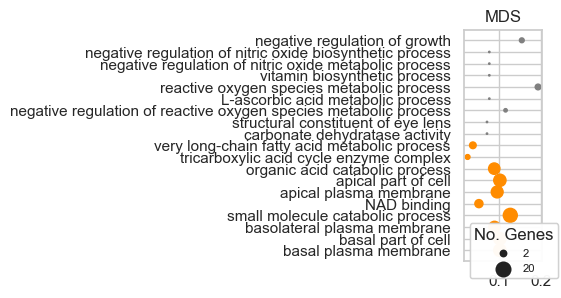

In [19]:
import pandas as pd
from sciutil import SciUtil
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (1,3)
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 8})

cmaps = {'Down regulated': {'CpG': 'darkorange', 'Protein': 'royalblue', 'RNA': 'teal'},
        'Up regulated': {'CpG': 'limegreen', 'Protein': 'darkred', 'RNA': 'lightcoral'},
        }
cmaps = {'MDS': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'},
         'MDS_TMDE': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'},
         'MDE': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'},
         'MDE_TMDS': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'}, 
         'TMDE': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'}, 
         'TMDS': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'},
         'TPDE': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'}, 
         'TPDE_TMDS': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'},
          'TPDS': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'},
         'TPDS_TMDE': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'}}

u = SciUtil()
plt.rc('legend', fontsize=8)    # legend fontsize
test_title = 'PanCan'
rcm_labels = ["TMDE", "TMDS", "TPDE_TMDS", "TPDE", "TPDS_TMDE", "TPDS", "MDS_TMDE", "MDE",  "MDE_TMDS", "MDS"]

comparisons = {}
# Create the comparisons for these 
for r in rcm_labels:
    comparisons[r] = [f'{input_dir}/ORA_PanCan/ClusterGoSummary_{r}_RCM.csv',
                      f'{input_dir}/ORA_ccRCC/ClusterGoSummary_{r}_RCM.csv',
                     ]

for c in comparisons:
    combined_df = pd.DataFrame()
    rna_df = pd.read_csv(f'{comparisons[c][0]}')
    rna_df['GeneRatio'] = [int(g.split('/')[0])/int(g.split('/')[1]) for g in rna_df['GeneRatio'].values]
    rna_df['Data'] = 'RNA'
    rna_df = rna_df[rna_df['p.adjust'] < 0.05]

    rna_df.sort_values('p.adjust', inplace=True)

    protein_df = pd.read_csv(f'{comparisons[c][1]}')
    protein_df['GeneRatio'] = [int(g.split('/')[0])/int(g.split('/')[1]) for g in protein_df['GeneRatio'].values]
    protein_df['Data'] = 'Protein'
    protein_df = protein_df[protein_df['p.adjust'] < 0.05]
    protein_df.sort_values('p.adjust', inplace=True)

    combined_df = pd.concat([combined_df, rna_df])
    combined_df = pd.concat([combined_df, protein_df])
    # Concat all together
    num = 10
    rna_df = pd.concat([rna_df.head(num), protein_df.head(num)])
    rna_df.sort_values('p.adjust', inplace=True)

    max_c = max(rna_df['Count'].values)
    min_c = min(rna_df['Count'].values)
    size = [int(1 + ((int(c) - min_c)/(max_c - min_c))*100) for c in rna_df['Count'].values]

    norm = mpl.colors.Normalize(vmin=np.min(rna_df['p.adjust'].values), vmax=np.max(rna_df['p.adjust'].values))
    cmap = cm.RdBu
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    c_map = cmaps[c]
    colours = [c_map.get(v) for v in rna_df['Data'].values]
    plt.scatter(rna_df['GeneRatio'].values, rna_df['Description'].values, s=size, c=colours)
    plt.title(c)
    combined_df.to_csv(os.path.join(output_dir, f'{c}_StageIV-StageI-Tumour.csv'), index=False)

    gmin = plt.scatter([], [], s=10 + int(100*(min_c/(max_c - min_c))), marker='o', color='#222')
    gmax = plt.scatter([], [], s=10 + int(100*(1)), marker='o', color='#222')
    legend = plt.legend((gmin, gmax),
                        (str(min_c), str(max_c)),
                        scatterpoints=1,
                        loc='lower left',
                        ncol=1,
                        fontsize=8, bbox_to_anchor=(0, -0.1))
    
    legend.set_title("No. Genes")
    plt.gca().add_artist(legend)
    plt.savefig(os.path.join(fig_dir, f'DotPlot_GO_{c}.svg'))
    plt.show()


In [20]:
comparisons

{'TMDE': ['Input_Data/ORA_PanCan/ClusterGoSummary_TMDE_RCM.csv',
  'Input_Data/ORA_ccRCC/ClusterGoSummary_TMDE_RCM.csv'],
 'TMDS': ['Input_Data/ORA_PanCan/ClusterGoSummary_TMDS_RCM.csv',
  'Input_Data/ORA_ccRCC/ClusterGoSummary_TMDS_RCM.csv'],
 'TPDE_TMDS': ['Input_Data/ORA_PanCan/ClusterGoSummary_TPDE_TMDS_RCM.csv',
  'Input_Data/ORA_ccRCC/ClusterGoSummary_TPDE_TMDS_RCM.csv'],
 'TPDE': ['Input_Data/ORA_PanCan/ClusterGoSummary_TPDE_RCM.csv',
  'Input_Data/ORA_ccRCC/ClusterGoSummary_TPDE_RCM.csv'],
 'TPDS_TMDE': ['Input_Data/ORA_PanCan/ClusterGoSummary_TPDS_TMDE_RCM.csv',
  'Input_Data/ORA_ccRCC/ClusterGoSummary_TPDS_TMDE_RCM.csv'],
 'TPDS': ['Input_Data/ORA_PanCan/ClusterGoSummary_TPDS_RCM.csv',
  'Input_Data/ORA_ccRCC/ClusterGoSummary_TPDS_RCM.csv'],
 'MDS_TMDE': ['Input_Data/ORA_PanCan/ClusterGoSummary_MDS_TMDE_RCM.csv',
  'Input_Data/ORA_ccRCC/ClusterGoSummary_MDS_TMDE_RCM.csv'],
 'MDE': ['Input_Data/ORA_PanCan/ClusterGoSummary_MDE_RCM.csv',
  'Input_Data/ORA_ccRCC/ClusterGoSummary_

In [24]:
with pd.ExcelWriter('SiRCLe_PanCan_ORA_joined_sheets.xlsx') as writer:
        # Also read in the patient information
    for c in comparisons:
        combined_df = pd.DataFrame()
        rna_df = pd.read_csv(f'{comparisons[c][0]}', index_col=0)
        rna_df['GeneRatio'] = [int(g.split('/')[0])/int(g.split('/')[1]) for g in rna_df['GeneRatio'].values]
        rna_df['Data'] = 'PanCan'
        rna_df = rna_df[rna_df['p.adjust'] < 0.05]

        rna_df.sort_values('p.adjust', inplace=True)

        protein_df = pd.read_csv(f'{comparisons[c][1]}', index_col=0)
        protein_df['GeneRatio'] = [int(g.split('/')[0])/int(g.split('/')[1]) for g in protein_df['GeneRatio'].values]
        protein_df['Data'] = 'ccRCC'
        protein_df = protein_df[protein_df['p.adjust'] < 0.05]
        protein_df.sort_values('p.adjust', inplace=True)
        
        combined_df = protein_df.join(rna_df, lsuffix='_ccRCC', rsuffix='_PanCan', how='outer')
        # geneID_PanCan and geneID_ccRCC
        cc = combined_df['geneID_ccRCC'].values
        cc_g_only = []
        p_g_only = []
        shared_g = []
        pc = []
        pp = []
        n_p = []
        n_c = []
        n_s = []
        for i, x in enumerate(combined_df['geneID_PanCan'].values):
            try:
                cc_g = cc[i].split('/')
            except:
                cc_g = []
            try:
                p_g = x.split('/')
            except:
                p_g = []
                
            shared = [g for g in cc_g if g in p_g]
            shared_g.append(' '.join(shared))
            cco = [g for g in cc_g if g not in p_g]
            cc_g_only.append(' '.join(cco))
            pgo = [g for g in p_g if g not in cc_g]
            p_g_only.append(' '.join(pgo))
            if len(cc_g) != 0 and len(shared) != 0:
                pc.append(len(shared)/len(cc_g))
            else:
                pc.append(0)
            if len(p_g) != 0 and len(shared) != 0:
                pp.append(len(shared)/len(p_g))
            else:
                pp.append(0)
            n_p.append(len(pgo))
            n_c.append(len(cco))
            n_s.append(len(shared))
        combined_df['ccRCC_genes_only'] = cc_g_only
        combined_df['PanCan_genes_only'] = p_g_only
        combined_df['shared'] = shared_g
        combined_df['percent shared of ccRCC'] = pc
        combined_df['percent shared of PanCan'] = pp
        combined_df['Number genes PanCan Only'] = n_p
        combined_df['Number genes ccRCC Only'] = n_c
        combined_df['Number genes shared'] = n_s
        combined_df.sort_values('Number genes shared', inplace=True)
        combined_df.to_excel(writer, sheet_name=c)
        
        

In [6]:
combined_df = protein_df.join(rna_df, lsuffix='_PanCan', rsuffix='_ccRCC', how='outer')
# geneID_PanCan and geneID_ccRCC
cc = combined_df['geneID_ccRCC'].values
cc_g_only = []
p_g_only = []
shared = []
pc = []
pp = []
n_p = []
n_c = []
n_s = []
for i, x in enumerate(combined_df['geneID_PanCan'].values):
    try:
        cc_g = cc[i].split('/')
    except:
        cc_g = []
    try:
        p_g = x.split('/')
    except:
        p_g = []
    if len(cc_g) > 0:
        print(p_g, cc_g)
    shared.append(' '.join([g for g in cc_g if g in p_g]))
    cc_g_only.append(' '.join([g for g in cc_g if g not in p_g]))
    p_g_only.append(' '.join([g for g in p_g if g not in cc_g]))
    pc.append(len(shared)/len(cc_g_only))
    pp.append(len(shared)/len(p_g_only))
    n_p.append(len(p_g_only))
    n_c.append(len(cc_g_only))
    n_s.append(len(shared))

combined_df['ccRCC_genes_only'] = cc_g_only
combined_df['PanCan_genes_only'] = p_g_only
combined_df['shared'] = shared
combined_df['percent shared of ccRCC'] = pc
combined_df['percent shared of PanCan'] = pp
combined_df['Number genes PanCan Only'] = n_p
combined_df['Number genes ccRCC Only'] = n_c
combined_df['Number genes shared'] = n_s

[] ['CA3', 'CA4']
[] ['HSPB6', 'CRYAB']
[] ['RGN', 'CYP27A1']
[] ['RGN', 'CYB5A']
[] ['RGN', 'CD34']
[] ['FHL1', 'CRYAB', 'RBP4', 'FRZB']
[] ['SOD3', 'CRYAB', 'RGN', 'CD34', 'GPX3']
[] ['RGN', 'CD34']
[] ['CRYAB', 'RGN', 'CD34']


In [7]:
combined_df

,ONTOLOGY_PanCan,ID_PanCan,Description_PanCan,GeneRatio_PanCan,BgRatio_PanCan,pvalue_PanCan,p.adjust_PanCan,qvalue_PanCan,geneID_PanCan,Count_PanCan,...,Count_ccRCC,Data_ccRCC,ccRCC_genes_only,PanCan_genes_only,shared,percent shared of ccRCC,percent shared of PanCan,Number genes PanCan Only,Number genes ccRCC Only,Number genes shared
GO:0000038,BP,GO:0000038,very long-chain fatty acid metabolic process,0.037975,34/17152,6.036612e-07,0.000429,0.000388,ACAA1/ACOT2/ACOX1/ACSL6/ACOX2/ACOT1,6.0,...,NaN,NaN,,ACAA1 ACOT2 ACOX1 ACSL6 ACOX2 ACOT1,,1.0,1.0,1,1,1
GO:0001655,BP,GO:0001655,urogenital system development,0.063291,318/17152,7.419318e-04,0.042771,0.038690,COL4A4/CALB1/ALDH1A2/RGN/RBP4/AQP2/COL4A3/UMOD...,10.0,...,NaN,NaN,,COL4A4 CALB1 ALDH1A2 RGN RBP4 AQP2 COL4A3 UMOD...,,1.0,1.0,2,2,2
GO:0002791,BP,GO:0002791,regulation of peptide secretion,0.063291,303/17152,5.108787e-04,0.035468,0.032083,CASR/LLGL2/RAPGEF3/RAB11FIP3/CHGA/WLS/RBP4/HAD...,10.0,...,NaN,NaN,,CASR LLGL2 RAPGEF3 RAB11FIP3 CHGA WLS RBP4 HAD...,,1.0,1.0,3,3,3
GO:0004089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,ccRCC,CA3 CA4,,,1.0,1.0,4,4,4
GO:0005212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,ccRCC,HSPB6 CRYAB,,,1.0,1.0,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GO:0098862,CC,GO:0098862,cluster of actin-based cell projections,0.038217,154/17707,2.524887e-03,0.036891,0.031450,CALB1/ATP6V0A4/FOLR1/PTH1R/DCXR/SLC22A12,6.0,...,NaN,NaN,,CALB1 ATP6V0A4 FOLR1 PTH1R DCXR SLC22A12,,1.0,1.0,73,73,73
GO:1901616,BP,GO:1901616,organic hydroxy compound catabolic process,0.031646,73/17152,5.646239e-04,0.035468,0.032083,CYP24A1/MOXD1/CYP27B1/LDHD/INPP5J,5.0,...,NaN,NaN,,CYP24A1 MOXD1 CYP27B1 LDHD INPP5J,,1.0,1.0,74,74,74
GO:1904406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,ccRCC,RGN CD34,,,1.0,1.0,75,75,75
GO:1990204,CC,GO:1990204,oxidoreductase complex,0.031847,109/17707,2.865031e-03,0.039658,0.033809,DLST/DBT/GPD1L/UQCRFS1/OGDHL,5.0,...,NaN,NaN,,DLST DBT GPD1L UQCRFS1 OGDHL,,1.0,1.0,76,76,76


In [13]:
combined_df = pd.DataFrame()
rna_df = pd.read_csv(f'{comparisons[c][0]}', index_col=0)
rna_df['GeneRatio'] = [int(g.split('/')[0])/int(g.split('/')[1]) for g in rna_df['GeneRatio'].values]
rna_df['Data'] = 'ccRCC'
rna_df = rna_df[rna_df['p.adjust'] < 0.05]

rna_df.sort_values('p.adjust', inplace=True)

protein_df = pd.read_csv(f'{comparisons[c][1]}', index_col=0)
protein_df['GeneRatio'] = [int(g.split('/')[0])/int(g.split('/')[1]) for g in protein_df['GeneRatio'].values]
protein_df['Data'] = 'PanCan'
protein_df = protein_df[protein_df['p.adjust'] < 0.05]
protein_df.sort_values('p.adjust', inplace=True)


combined_df = protein_df.join(rna_df, lsuffix='_PanCan', rsuffix='_ccRCC', how='outer')
# geneID_PanCan and geneID_ccRCC
cc = combined_df['geneID_ccRCC'].values
cc_g_only = []
p_g_only = []
shared = []
for i, x in enumerate(combined_df['geneID_PanCan'].values):
    try:
        cc_g = cc[i].split('/')
    except:
        cc_g = []
    try:
        p_g = x.split('/')
    except:
        p_g = []
    shared.append(' '.join([g for g in cc_g if g in p_g]))
    cc_g_only.append(' '.join([g for g in cc_g if g not in p_g]))
    p_g_only.append(' '.join([g for g in p_g if g not in cc_g]))
combined_df['ccRCC_genes_only'] = cc_g_only
combined_df['PanCan_genes_only'] = p_g_only
combined_df['shared'] = shared
combined_df

,ONTOLOGY_PanCan,ID_PanCan,Description_PanCan,GeneRatio_PanCan,BgRatio_PanCan,pvalue_PanCan,p.adjust_PanCan,qvalue_PanCan,geneID_PanCan,Count_PanCan,...,BgRatio_ccRCC,pvalue_ccRCC,p.adjust_ccRCC,qvalue_ccRCC,geneID_ccRCC,Count_ccRCC,Data_ccRCC,ccRCC_genes_only,PanCan_genes_only,shared
GO:0000038,BP,GO:0000038,very long-chain fatty acid metabolic process,0.037975,34/17152,6.036612e-07,0.000429,0.000388,ACAA1/ACOT2/ACOX1/ACSL6/ACOX2/ACOT1,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,ACAA1 ACOT2 ACOX1 ACSL6 ACOX2 ACOT1,
GO:0001655,BP,GO:0001655,urogenital system development,0.063291,318/17152,7.419318e-04,0.042771,0.038690,COL4A4/CALB1/ALDH1A2/RGN/RBP4/AQP2/COL4A3/UMOD...,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,COL4A4 CALB1 ALDH1A2 RGN RBP4 AQP2 COL4A3 UMOD...,
GO:0002791,BP,GO:0002791,regulation of peptide secretion,0.063291,303/17152,5.108787e-04,0.035468,0.032083,CASR/LLGL2/RAPGEF3/RAB11FIP3/CHGA/WLS/RBP4/HAD...,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,CASR LLGL2 RAPGEF3 RAB11FIP3 CHGA WLS RBP4 HAD...,
GO:0004089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12/17127,0.000168,0.015324,0.009927,CA3/CA4,2.0,ccRCC,CA3 CA4,,
GO:0005212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19/17127,0.000433,0.019712,0.012769,HSPB6/CRYAB,2.0,ccRCC,HSPB6 CRYAB,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GO:0098862,CC,GO:0098862,cluster of actin-based cell projections,0.038217,154/17707,2.524887e-03,0.036891,0.031450,CALB1/ATP6V0A4/FOLR1/PTH1R/DCXR/SLC22A12,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,CALB1 ATP6V0A4 FOLR1 PTH1R DCXR SLC22A12,
GO:1901616,BP,GO:1901616,organic hydroxy compound catabolic process,0.031646,73/17152,5.646239e-04,0.035468,0.032083,CYP24A1/MOXD1/CYP27B1/LDHD/INPP5J,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,CYP24A1 MOXD1 CYP27B1 LDHD INPP5J,
GO:1904406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18/17251,0.000329,0.045530,0.035799,RGN/CD34,2.0,ccRCC,RGN CD34,,
GO:1990204,CC,GO:1990204,oxidoreductase complex,0.031847,109/17707,2.865031e-03,0.039658,0.033809,DLST/DBT/GPD1L/UQCRFS1/OGDHL,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,DLST DBT GPD1L UQCRFS1 OGDHL,


In [12]:
combined_df[combined_df['Description_PanCan'] == 'lung development']

,ONTOLOGY_PanCan,ID_PanCan,Description_PanCan,GeneRatio_PanCan,BgRatio_PanCan,pvalue_PanCan,p.adjust_PanCan,qvalue_PanCan,geneID_PanCan,Count_PanCan,...,BgRatio_ccRCC,pvalue_ccRCC,p.adjust_ccRCC,qvalue_ccRCC,geneID_ccRCC,Count_ccRCC,Data_ccRCC,ccRCC_genes_only,PanCan_genes_only,shared


## Look at just what is shared...

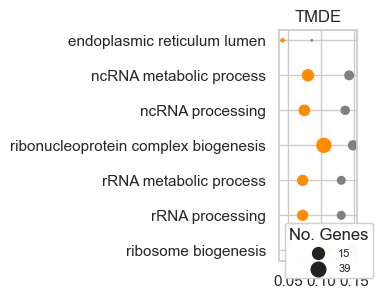

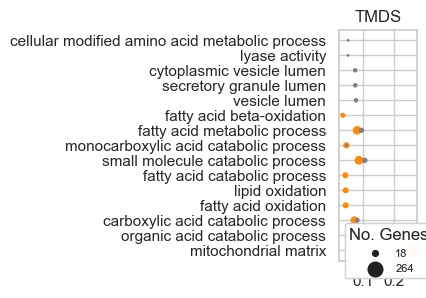

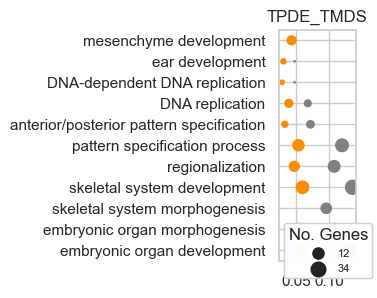

NO shared TPDE


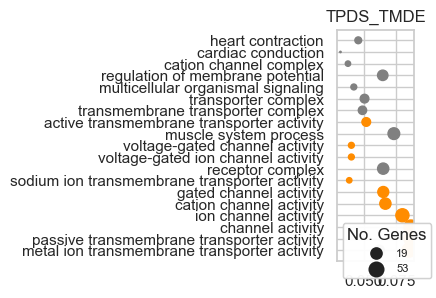

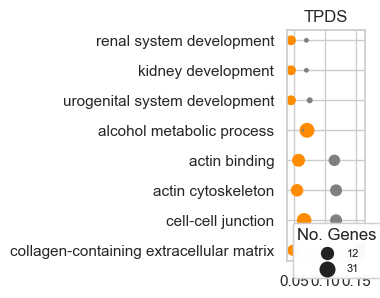

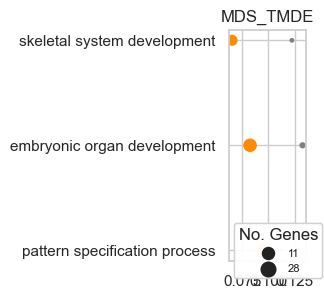

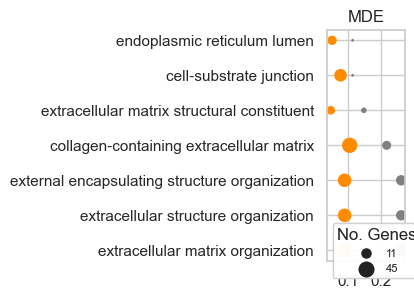

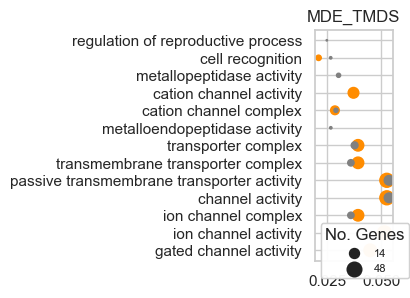

NO shared MDS


In [14]:
import pandas as pd
from sciutil import SciUtil
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (1,3)
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 8})

cmaps = {'Down regulated': {'CpG': 'darkorange', 'Protein': 'royalblue', 'RNA': 'teal'},
        'Up regulated': {'CpG': 'limegreen', 'Protein': 'darkred', 'RNA': 'lightcoral'},
        }
cmaps = {'MDS': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'},
         'MDS_TMDE': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'},
         'MDE': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'},
         'MDE_TMDS': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'}, 
         'TMDE': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'}, 
         'TMDS': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'},
         'TPDE': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'}, 
         'TPDE_TMDS': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'},
          'TPDS': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'},
         'TPDS_TMDE': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'}}

u = SciUtil()
plt.rc('legend', fontsize=8)    # legend fontsize
test_title = 'PanCan'
rcm_labels = ["TMDE", "TMDS", "TPDE_TMDS", "TPDE", "TPDS_TMDE", "TPDS", "MDS_TMDE", "MDE",  "MDE_TMDS", "MDS"]

comparisons = {}
# Create the comparisons for these 
for r in rcm_labels:
    comparisons[r] = [f'{input_dir}/ORA_PanCan/ClusterGoSummary_{r}_RCM.csv',
                      f'{input_dir}/ORA_ccRCC/ClusterGoSummary_{r}_RCM.csv',
                     ]

for c in comparisons:
    try:
        combined_df = pd.DataFrame()
        rna_df = pd.read_csv(f'{comparisons[c][0]}')
        rna_df['GeneRatio'] = [int(g.split('/')[0])/int(g.split('/')[1]) for g in rna_df['GeneRatio'].values]
        rna_df['Data'] = 'RNA'
        rna_df = rna_df[rna_df['p.adjust'] < 0.05]
        rna_df = rna_df[rna_df['Count'] > 10]
        rna_df.sort_values('p.adjust', inplace=True)

        protein_df = pd.read_csv(f'{comparisons[c][1]}')
        protein_df['GeneRatio'] = [int(g.split('/')[0])/int(g.split('/')[1]) for g in protein_df['GeneRatio'].values]
        protein_df['Data'] = 'Protein'
        protein_df = protein_df[protein_df['p.adjust'] < 0.05]
        protein_df = protein_df[protein_df['Count'] > 10]
        protein_df.sort_values('p.adjust', inplace=True)

        # Filter to only include shared GO terms
        shared_go = list(set(rna_df['ID'].values) & set(protein_df['ID'].values))
        combined_df = pd.concat([combined_df, rna_df])
        combined_df = pd.concat([combined_df, protein_df])
        rna_df = rna_df[rna_df['ID'].isin(shared_go)]
        protein_df = protein_df[protein_df['ID'].isin(shared_go)]

        # Concat all together
        num = 10
        rna_df = pd.concat([rna_df.head(num), protein_df.head(num)])
        rna_df.sort_values('p.adjust', inplace=True)

        max_c = max(rna_df['Count'].values)
        min_c = min(rna_df['Count'].values)
        size = [int(1 + ((int(c) - min_c)/(max_c - min_c))*100) for c in rna_df['Count'].values]

        norm = mpl.colors.Normalize(vmin=np.min(rna_df['p.adjust'].values), vmax=np.max(rna_df['p.adjust'].values))
        cmap = cm.RdBu
        m = cm.ScalarMappable(norm=norm, cmap=cmap)
        c_map = cmaps[c]
        colours = [c_map.get(v) for v in rna_df['Data'].values]
        plt.scatter(rna_df['GeneRatio'].values, rna_df['Description'].values, s=size, c=colours)
        plt.title(c)
        combined_df.to_csv(os.path.join(output_dir, f'{c}_StageIV-StageI-Tumour.csv'), index=False)

        gmin = plt.scatter([], [], s=10 + int(100*(min_c/(max_c - min_c))), marker='o', color='#222')
        gmax = plt.scatter([], [], s=10 + int(100*(1)), marker='o', color='#222')
        legend = plt.legend((gmin, gmax),
                            (str(min_c), str(max_c)),
                            scatterpoints=1,
                            loc='lower left',
                            ncol=1,
                            fontsize=8, bbox_to_anchor=(0, -0.1))

        legend.set_title("No. Genes")
        plt.gca().add_artist(legend)
        plt.savefig(os.path.join(fig_dir, f'DotPlot_GO_{c}_Shared.svg'))
        plt.show()
    except:
        print("NO shared", c)


## Also get the unique ones

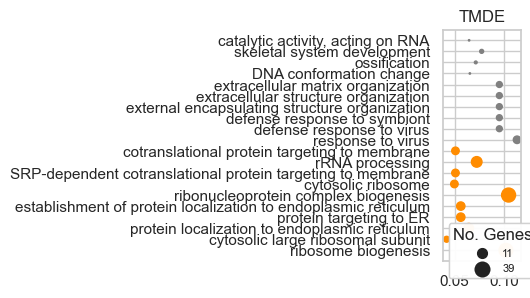

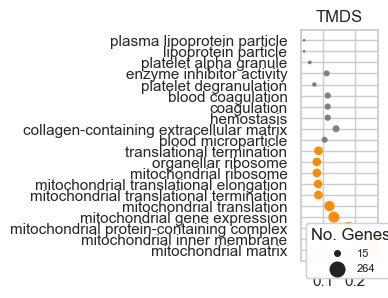

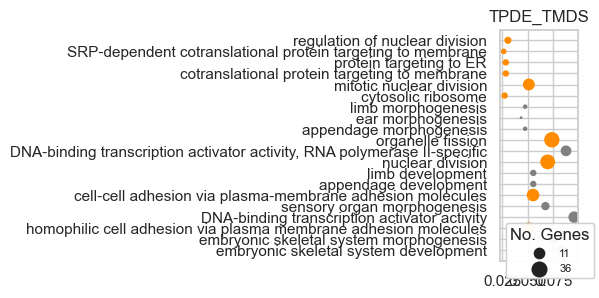

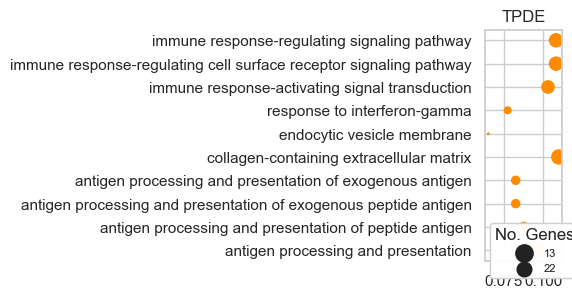

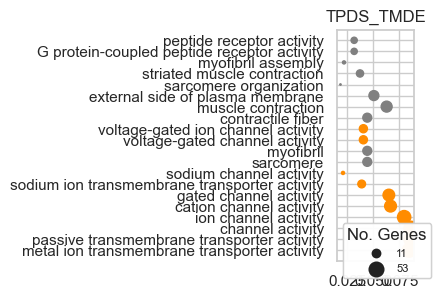

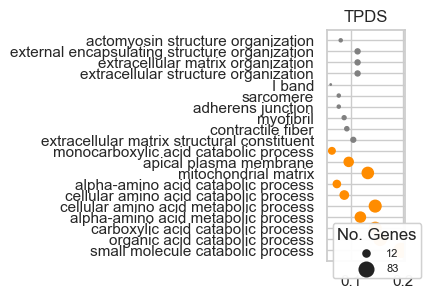

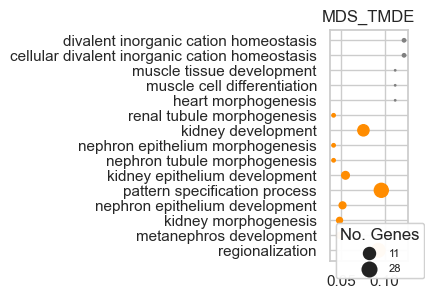

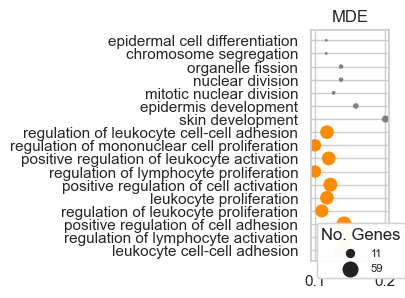

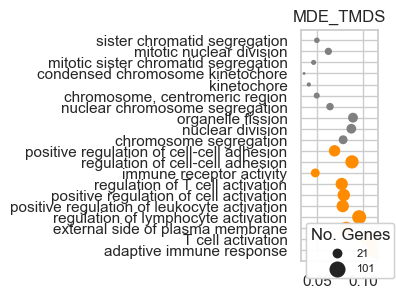

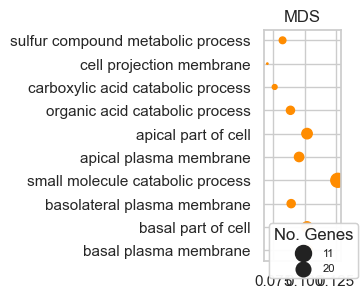

In [24]:
import pandas as pd
from sciutil import SciUtil
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (1,3)
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 8})

cmaps = {'Down regulated': {'CpG': 'teal', 'Protein': 'royalblue', 'RNA': 'teal'},
        'Up regulated': {'CpG': 'limegreen', 'Protein': 'darkred', 'RNA': 'lightcoral'},
        }
cmaps = {'MDS': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'},
         'MDS_TMDE': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'},
         'MDE': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'},
         'MDE_TMDS': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'}, 
         'TMDE': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'}, 
         'TMDS': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'},
         'TPDE': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'}, 
         'TPDE_TMDS': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'},
          'TPDS': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'},
         'TPDS_TMDE': {'CpG': 'darkorange', 'Protein': 'darkorange', 'RNA': 'grey'}}

u = SciUtil()
plt.rc('legend', fontsize=8)    # legend fontsize
test_title = 'PanCan'
rcm_labels = ["TMDE", "TMDS", "TPDE_TMDS", "TPDE", "TPDS_TMDE", "TPDS", "MDS_TMDE", "MDE",  "MDE_TMDS", "MDS"]

comparisons = {}
# Create the comparisons for these 
for r in rcm_labels:
    comparisons[r] = [f'{input_dir}/ORA_PanCan/ClusterGoSummary_{r}_RCM.csv',
                      f'{input_dir}/ORA_ccRCC/ClusterGoSummary_{r}_RCM.csv',
                     ]

for c in comparisons:
    try:
        combined_df = pd.DataFrame()
        rna_df = pd.read_csv(f'{comparisons[c][0]}')
        rna_df['GeneRatio'] = [int(g.split('/')[0])/int(g.split('/')[1]) for g in rna_df['GeneRatio'].values]
        rna_df['Data'] = 'RNA'
        rna_df = rna_df[rna_df['p.adjust'] < 0.05]
        rna_df = rna_df[rna_df['Count'] > 10]
        rna_df.sort_values('p.adjust', inplace=True)

        protein_df = pd.read_csv(f'{comparisons[c][1]}')
        protein_df['GeneRatio'] = [int(g.split('/')[0])/int(g.split('/')[1]) for g in protein_df['GeneRatio'].values]
        protein_df['Data'] = 'Protein'
        protein_df = protein_df[protein_df['p.adjust'] < 0.05]
        protein_df = protein_df[protein_df['Count'] > 10]
        protein_df.sort_values('p.adjust', inplace=True)

        # Filter to only include shared GO terms
        shared_go = [x for x in rna_df['ID'].values if x not in list(protein_df['ID'].values)]
        combined_df = pd.concat([combined_df, rna_df])
        combined_df = pd.concat([combined_df, protein_df])
        rna_df = rna_df[rna_df['ID'].isin(shared_go)]
        
        shared_go = [x for x in protein_df['ID'].values if x not in list(rna_df['ID'].values)]
        protein_df = protein_df[protein_df['ID'].isin(shared_go)]

        # Concat all together
        num = 10
        rna_df = pd.concat([rna_df.head(num), protein_df.head(num)])
        rna_df.sort_values('p.adjust', inplace=True)

        max_c = max(rna_df['Count'].values)
        min_c = min(rna_df['Count'].values)
        size = [int(1 + ((int(c) - min_c)/(max_c - min_c))*100) for c in rna_df['Count'].values]

        norm = mpl.colors.Normalize(vmin=np.min(rna_df['p.adjust'].values), vmax=np.max(rna_df['p.adjust'].values))
        cmap = cm.RdBu
        m = cm.ScalarMappable(norm=norm, cmap=cmap)
        c_map = cmaps[c]
        colours = [c_map.get(v) for v in rna_df['Data'].values]
        plt.scatter(rna_df['GeneRatio'].values, rna_df['Description'].values, s=size, c=colours)
        plt.title(c)
        combined_df.to_csv(os.path.join(output_dir, f'{c}_StageIV-StageI-Tumour.csv'), index=False)

        gmin = plt.scatter([], [], s=10 + int(100*(min_c/(max_c - min_c))), marker='o', color='#222')
        gmax = plt.scatter([], [], s=10 + int(100*(1)), marker='o', color='#222')
        legend = plt.legend((gmin, gmax),
                            (str(min_c), str(max_c)),
                            scatterpoints=1,
                            loc='lower left',
                            ncol=1,
                            fontsize=8, bbox_to_anchor=(0, -0.1))

        legend.set_title("No. Genes")
        plt.gca().add_artist(legend)
        plt.savefig(os.path.join(fig_dir, f'DotPlot_GO_{c}_UNIQUE.svg'))
        plt.show()
    except:
        print("NO shared", c)


## Next we want to look at what genes differ in the stage I vs stage IV comparison that come up as important

In [12]:
from sciutil import SciUtil

u = SciUtil()

ccrcc = pd.read_csv(os.path.join(input_dir, 'ClearCellRenalCellCarcinoma_mean_Integrated_comparison_Late-Early.csv'))
pancan = pd.read_csv(os.path.join(input_dir, 'PanCan_mean_Integrated_comparison_Late-Early.csv'))

rcm_labels = ["TMDE", "TMDS", "TPDE_TMDS", "TPDE", "TPDS_TMDE", "TPDS", "MDS_TMDE", "MDE",  "MDE_TMDS", "MDS"]

for r in rcm_labels:
    ccrcc_r = ccrcc[ccrcc[reg_label].values == r]
    pancan_r = pancan[pancan[reg_label].values == r]
    #ccrcc_r = ccrcc_r[ccrcc_r['Integrated padj (Late-Early)'] < 0.25]
    if len(ccrcc_r.values) > 1:
        ccrcc_r.sort_values('Integrated diff (Late-Early)', inplace=True)
        u.dp(['ccRCC LOW tail', r])
        print('\n'.join(list(ccrcc_r.head()['id'].values)))
        u.dp(['ccRCC HIGH tail', r])
        print('\n'.join(list(ccrcc_r.tail()['id'].values)))


--------------------------------------------------------------------------------
                              ccRCC LOW tail	TMDE	                              
--------------------------------------------------------------------------------
PAMR1
DGKH
ARHGEF10
COL6A3
A2M
--------------------------------------------------------------------------------
                             ccRCC HIGH tail	TMDE	                              
--------------------------------------------------------------------------------
TMED9
XPOT
CCDC86
NCEH1
HM13
--------------------------------------------------------------------------------
                              ccRCC LOW tail	TMDS	                              
--------------------------------------------------------------------------------
FBLIM1
TPRN
HOPX
CENPV
CLDN7
--------------------------------------------------------------------------------
                             ccRCC HIGH tail	TMDS	                              
--------------------

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_28439/1340551624.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccrcc_r.sort_values('Integrated diff (Late-Early)', inplace=True)


In [13]:
for r in rcm_labels:
    pancan_r = pancan[pancan[reg_label].values == r]
    #pancan_r = pancan_r[pancan_r['Integrated padj (Late-Early)'] < 0.2]
    if len(pancan_r.values) > 1:
        pancan_r.sort_values('Integrated diff (Late-Early)', inplace=True)
        u.dp(['PanCan LOW tail', r])
        print('\n'.join(list(pancan_r.head()['id'].values)))
        u.dp(['PanCan HIGH tail', r])
        print('\n'.join(list(pancan_r.tail()['id'].values)))


--------------------------------------------------------------------------------
                             PanCan LOW tail	TMDE	                              
--------------------------------------------------------------------------------
ITGBL1
SELENOK
CPD
BZW2
SPINT1
--------------------------------------------------------------------------------
                             PanCan HIGH tail	TMDE	                             
--------------------------------------------------------------------------------
BMP1
TAP2
SERPINE1
EIF2AK2
OAS2
--------------------------------------------------------------------------------
                             PanCan LOW tail	TMDS	                              
--------------------------------------------------------------------------------
KLK11
PPL
ABLIM2
COQ9
EVPL
--------------------------------------------------------------------------------
                             PanCan HIGH tail	TMDS	                             
-------------------

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_28439/2038062952.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pancan_r.sort_values('Integrated diff (Late-Early)', inplace=True)


## For comparison look at each of the raw logFCs for methylation, RNA, and protein and check if the low and high changes correspond

i.e. we want to check if they compare

In [14]:
pancan.sort_values('Protein-LogFC mean (Late-Early)', inplace=True)
u.dp(['PanCan LOW tail Protein', r])
print('\n'.join(list(pancan.head()['id'].values)))
u.dp(['PanCan HIGH tail Protein', r])
print('\n'.join(list(pancan.tail()['id'].values)))

--------------------------------------------------------------------------------
                          PanCan LOW tail Protein	MDS	                          
--------------------------------------------------------------------------------
KRT13
ADH7
PLA2G2A
CRABP2
PTN
--------------------------------------------------------------------------------
                         PanCan HIGH tail Protein	MDS	                          
--------------------------------------------------------------------------------
ANXA3
ENPEP
CAMP
CAV2
CA4


In [15]:
pancan.sort_values('RNA-LogFC mean (Late-Early)', inplace=True)
u.dp(['PanCan LOW tail RNA', r])
print('\n'.join(list(pancan.head()['id'].values)))
u.dp(['PanCan HIGH tail RNA', r])
print('\n'.join(list(pancan.tail()['id'].values)))

--------------------------------------------------------------------------------
                            PanCan LOW tail RNA	MDS	                            
--------------------------------------------------------------------------------
KRT13
KRT4
KRT19
CEACAM5
KRT15
--------------------------------------------------------------------------------
                           PanCan HIGH tail RNA	MDS	                            
--------------------------------------------------------------------------------
INHBA
SFTPA1
FCN3
CAV1
AGER


In [16]:
pancan.sort_values('CpG-LogFC mean (Late-Early)', inplace=True)
u.dp(['PanCan LOW tail CpG', r])
print('\n'.join(list(pancan.head()['id'].values)))
u.dp(['PanCan HIGH tail CpG', r])
print('\n'.join(list(pancan.tail()['id'].values)))

--------------------------------------------------------------------------------
                            PanCan LOW tail CpG	MDS	                            
--------------------------------------------------------------------------------
SPATS2
ATP8A1
PCCB
CPD
AQP4
--------------------------------------------------------------------------------
                           PanCan HIGH tail CpG	MDS	                            
--------------------------------------------------------------------------------
ERO1A
OVCH2
CLDN18
ROBO4
HOXC9


In [17]:
ccrcc.sort_values('Protein-LogFC mean (Late-Early)', inplace=True)
u.dp(['ccRCC LOW tail Protein', r])
print('\n'.join(list(ccrcc.head()['id'].values)))
u.dp(['ccRCC HIGH tail Protein', r])
print('\n'.join(list(ccrcc.tail()['id'].values)))

--------------------------------------------------------------------------------
                          ccRCC LOW tail Protein	MDS	                           
--------------------------------------------------------------------------------
UMOD
CPA3
SLC7A9
CLDN7
G6PC
--------------------------------------------------------------------------------
                          ccRCC HIGH tail Protein	MDS	                          
--------------------------------------------------------------------------------
GLIPR1
PDIA2
FABP7
IGFLR1
FABP6


In [18]:
ccrcc.sort_values('RNA-LogFC mean (Late-Early)', inplace=True)
u.dp(['ccRCC LOW tail RNA', r])
print('\n'.join(list(ccrcc.head()['id'].values)))
u.dp(['ccRCC HIGH tail RNA', r])
print('\n'.join(list(ccrcc.tail()['id'].values)))

--------------------------------------------------------------------------------
                            ccRCC LOW tail RNA	MDS	                             
--------------------------------------------------------------------------------
LTF
ALDOB
STEAP4
LUM
REG1A
--------------------------------------------------------------------------------
                            ccRCC HIGH tail RNA	MDS	                            
--------------------------------------------------------------------------------
IGF2BP3
C1QL1
OR2AT4
FAM151A
IL20RB


In [19]:
ccrcc.sort_values('CpG-LogFC mean (Late-Early)', inplace=True)
u.dp(['ccRCC LOW tail CpG', r])
print('\n'.join(list(ccrcc.head()['id'].values)))
u.dp(['ccRCC HIGH tail CpG', r])
print('\n'.join(list(ccrcc.tail()['id'].values)))

--------------------------------------------------------------------------------
                            ccRCC LOW tail CpG	MDS	                             
--------------------------------------------------------------------------------
SMC4
B4GALNT2
GTSF1
GPR82
CASK
--------------------------------------------------------------------------------
                            ccRCC HIGH tail CpG	MDS	                            
--------------------------------------------------------------------------------
ESF1
CACNA2D3
TMEM155
HOXA7
RAB9B


# Lastly look at the pathways!

In [20]:
pancan_metabolic_pathways = pd.read_csv(os.path.join(input_dir, 'PanCan_Late_vs_Early_All_GSEA_MetabolicPathways.csv'))
ccrcc_metabolic_pathways = pd.read_csv(os.path.join(input_dir, f'ClearCellRenalCellCarcinoma_Late_vs_Early_All_GSEA_MetabolicPathways.csv'))
ccrcc_metabolic_pathways

,pathway,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
0,Alanine and Aspartate Metabolism,0.014339,0.118568,0.565721,1.628672,92,20,NaN
1,Amino and Nucleotide Sugar Metabolism,0.503112,0.749078,0.550645,0.998549,2909,4,NaN
2,Arginine and Proline Metabolism,0.096271,0.353695,0.495757,1.375701,616,17,NaN
3,beta-Alanine metabolism,0.044252,0.247074,-0.769299,-1.590818,183,5,NaN
4,Bile Acid Biosynthesis,0.557572,0.776164,0.369497,0.931154,3471,12,NaN
...,...,...,...,...,...,...,...,...
62,Tryptophan metabolism,0.074895,0.330567,0.512519,1.422215,479,17,NaN
63,Tyrosine metabolism,0.671626,0.818163,0.272046,0.866257,4558,30,NaN
64,Urea Cycle,0.622580,0.786314,0.382026,0.883746,3793,9,NaN
65,"Valine, Leucine and Isoleucine Metabolism",0.002946,0.040228,0.542631,1.739766,19,31,NaN


In [21]:
ccrcc_metabolic_pathways = ccrcc_metabolic_pathways[ccrcc_metabolic_pathways['padj'] < 0.25]
ccrcc_metabolic_pathways

,pathway,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
0,Alanine and Aspartate Metabolism,0.014339,0.118568,0.565721,1.628672,92,20,NaN
3,beta-Alanine metabolism,0.044252,0.247074,-0.769299,-1.590818,183,5,NaN
10,Citric Acid Cycle,0.000282,0.007494,0.547291,1.925616,1,48,NaN
17,Ethanol Metabolism,0.018351,0.122951,-0.713552,-1.726208,72,8,NaN
26,Glutamate metabolism,0.003753,0.041904,0.567009,1.741973,24,26,NaN
27,Glutathione Metabolism,0.012191,0.116687,0.689702,1.646831,74,10,NaN
29,"Glycine, Serine and Threonine Metabolism",0.033878,0.206350,0.465506,1.492490,229,31,NaN
42,Oxidative Phosphorylation,0.000139,0.007494,0.574652,2.109133,0,60,NaN
49,Protein Modification,0.000336,0.007494,0.920089,1.976506,1,7,NaN
57,Steroid Metabolism,0.003002,0.040228,0.576724,1.771820,19,26,NaN


In [22]:
pancan_metabolic_pathways = pancan_metabolic_pathways[pancan_metabolic_pathways['padj'] < 0.25]
pancan_metabolic_pathways

,pathway,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
0,O-Glycan Biosynthesis,0.001418,0.060993,-0.940797,-1.851958,4,4,NaN
